In [1]:
import numpy as np
import glob, os, sys
import xarray as xr
import pandas as pd
import time, datetime, calendar, pytz
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline

In [21]:
xr.set_options(display_style='text')

In [2]:
# datadir = '/global/cscratch1/sd/feng045/waccem/MERGIR_Global/stats/'
datadir = '/global/project/projectdirs/m1867/zfeng/gpm/MERGIR_Global/stats/'
datafiles = sorted(glob.glob(f'{datadir}merg_monthly_validcount_*nc'))
# datafiles = sorted(glob.glob(f'{datadir}merg_monthly_validcount_2015*nc'))

print(len(datafiles))

figdir = datadir

239


In [3]:
# Read data
# ds = xr.open_mfdataset(datafiles, concat_dim='time')
ds = xr.open_mfdataset(datafiles, concat_dim='time', combine='by_coords')
# Crop the region beyond 60S-60N
ds = ds.where((ds.lat >= -60) & (ds.lat <= 60), drop=True)
ds

/global/cfs/cdirs/m1867/zfeng/envs/py38/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


<xarray.Dataset>
Dimensions:       (lat: 1200, lon: 3600, time: 239)
Coordinates:
  * lon           (lon) float64 -179.9 -179.8 -179.8 ... 179.8 179.8 179.9
  * lat           (lat) float64 -59.95 -59.85 -59.75 ... 59.75 59.85 59.95
  * time          (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2020-11-01
Data variables:
    count_00min   (time, lat, lon) float32 dask.array<chunksize=(1, 1200, 3600), meta=np.ndarray>
    count_30min   (time, lat, lon) float32 dask.array<chunksize=(1, 1200, 3600), meta=np.ndarray>
    ntimes_00min  (time, lat) float64 dask.array<chunksize=(1, 1200), meta=np.ndarray>
    ntimes_30min  (time, lat) float64 dask.array<chunksize=(1, 1200), meta=np.ndarray>
    ntimes        (time, lat) float64 dask.array<chunksize=(1, 1200), meta=np.ndarray>
Attributes:
    title:       Valid data counts
    contact:     Zhe Feng, zhe.feng@pnnl.gov
    created_on:  Thu Aug 27 04:37:26 2020

In [4]:
lon = ds.lon
lat = ds.lat
ntimes = ds.ntimes

In [5]:
frac00_all = ds.count_00min.sum(dim='time') / ds.ntimes_00min.sum(dim='time')
frac30_all = ds.count_30min.sum(dim='time') / ds.ntimes_30min.sum(dim='time')
frac00_all.load()
frac30_all.load()

<xarray.DataArray (lat: 1200, lon: 3600)>
array([[0.33864645, 0.33843922, 0.33624605, ..., 0.34402289, 0.34781057,
        0.34939357],
       [0.61491702, 0.61816936, 0.61710444, ..., 0.62709747, 0.62427686,
        0.62190524],
       [0.83171292, 0.83198347, 0.83215616, ..., 0.83453353, 0.83426298,
        0.8375326 ],
       ...,
       [0.99677068, 0.9968743 , 0.99689157, ..., 0.99700094, 0.9968743 ,
        0.99692035],
       [0.88887354, 0.89412334, 0.89294328, ..., 0.89586176, 0.89547608,
        0.89517675],
       [0.44493182, 0.45415926, 0.45068242, ..., 0.45441254, 0.45133288,
        0.45503422]])
Coordinates:
  * lon      (lon) float64 -179.9 -179.8 -179.8 -179.6 ... 179.8 179.8 179.9
  * lat      (lat) float64 -59.95 -59.85 -59.75 -59.65 ... 59.75 59.85 59.95

In [22]:
# ds.ntimes_00min.groupby('time.year').sum(dim='time')
ds.time

<xarray.DataArray 'time' (time: 239)>
array(['2001-01-01T00:00:00.000000000', '2001-02-01T00:00:00.000000000',
       '2001-03-01T00:00:00.000000000', ..., '2020-09-01T00:00:00.000000000',
       '2020-10-01T00:00:00.000000000', '2020-11-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2020-11-01
Attributes:
    long_name:  Epoch Time (since 1970-01-01T00:00:00)

In [7]:
frac00_year = ds.count_00min.groupby('time.year').sum(dim='time') / ds.ntimes_00min.groupby('time.year').sum(dim='time')
frac30_year = ds.count_30min.groupby('time.year').sum(dim='time') / ds.ntimes_30min.groupby('time.year').sum(dim='time')
frac00_year.load()
frac30_year.load()
years = frac00_year.year

In [8]:
# fig = plt.figure(figsize=[10,3], dpi=100)
# (frac00_all*100).plot.pcolormesh(norm=mpl.colors.PowerNorm(gamma=1./2.), cmap='Spectral')

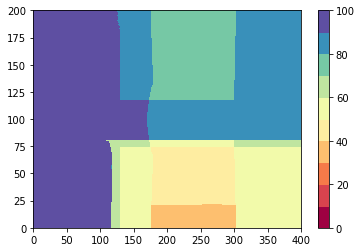

In [9]:
tmp = frac00_all.sel(lon=slice(120,160),lat=slice(-10,10))
levels = np.arange(0, 100.1, 10)
norm = mpl.colors.BoundaryNorm(boundaries=levels, ncolors=256)
# plt.pcolormesh(tmp*100, norm=mpl.colors.PowerNorm(gamma=1./2.), vmin=0, vmax=80, cmap='Spectral')
plt.pcolormesh(tmp*100, norm=norm, cmap='Spectral')
plt.colorbar()

In [14]:
np.arange(2000,2021,5), np.arange(2000,2020,5)

(array([2000, 2005, 2010, 2015, 2020]), array([2000, 2005, 2010, 2015]))

In [23]:
# pentad_bins = np.arange(2000,2021,5)
# pentad_label = np.arange(2000,2020,5)
# frac00_pentad = ds.count_00min.groupby_bins('time.year', bins=pentad_bins, labels=pentad_label).sum(dim='time') / ds.ntimes_00min.groupby_bins('time.year', bins=pentad_bins, labels=pentad_label).sum(dim='time')
# frac30_pentad = ds.count_30min.groupby_bins('time.year', bins=pentad_bins, labels=pentad_label).sum(dim='time') / ds.ntimes_30min.groupby_bins('time.year', bins=pentad_bins, labels=pentad_label).sum(dim='time')
# frac00_pentad.load()
# frac30_pentad.load()

In [24]:
pentad_bins = np.array([2000,2005,2010,2015,2021])
pentad_label = np.array([2000,2005,2010,2015])
frac00_pentad = ds.count_00min.groupby_bins('time.year', bins=pentad_bins, labels=pentad_label).sum(dim='time') / ds.ntimes_00min.groupby_bins('time.year', bins=pentad_bins, labels=pentad_label).sum(dim='time')
frac30_pentad = ds.count_30min.groupby_bins('time.year', bins=pentad_bins, labels=pentad_label).sum(dim='time') / ds.ntimes_30min.groupby_bins('time.year', bins=pentad_bins, labels=pentad_label).sum(dim='time')
frac00_pentad.load()
frac30_pentad.load()

<xarray.DataArray (year_bins: 4, lat: 1200, lon: 3600)>
array([[[0.20858447, 0.21123288, 0.2103653 , ..., 0.2119863 ,
         0.21189498, 0.2116895 ],
        [0.38493151, 0.38646119, 0.38705479, ..., 0.38840183,
         0.38742009, 0.38767123],
        [0.49031963, 0.49047945, 0.49061644, ..., 0.49100457,
         0.49098174, 0.49187215],
        ...,
        [0.99248858, 0.99276256, 0.99287671, ..., 0.99292237,
         0.99253425, 0.99283105],
        [0.89942922, 0.90191781, 0.90148402, ..., 0.9023516 ,
         0.90381279, 0.90203196],
        [0.4466895 , 0.45173516, 0.45262557, ..., 0.4539726 ,
         0.45552511, 0.45479452]],

       [[0.36547945, 0.3643379 , 0.36045662, ..., 0.3497032 ,
         0.35299087, 0.36047945],
        [0.65372146, 0.65479452, 0.65607306, ..., 0.6583105 ,
         0.6669863 , 0.65968037],
        [0.90783105, 0.90803653, 0.90799087, ..., 0.91481735,
         0.91461187, 0.92      ],
...
        [0.99968019, 0.99952029, 0.9996345 , ..., 0.9996345 ,
         0.99961166, 0.99968019],
        [0.89884868, 0.90645559, 0.90636422, ..., 0.90526773,
         0.90615863, 0.9053591 ],
        [0.4495614 , 0.46365588, 0.45148026, ..., 0.45657438,
         0.44698008, 0.45602613]],

       [[0.39962215, 0.39900815, 0.39723698, ..., 0.4285748 ,
         0.44340536, 0.44298028],
        [0.70220805, 0.7103318 , 0.70459322, ..., 0.73949699,
         0.72039202, 0.71635376],
        [0.95867281, 0.95907427, 0.9591215 , ..., 0.96084544,
         0.96068013, 0.965049  ],
        ...,
        [0.99907899, 0.99905538, 0.99889007, ..., 0.99919707,
         0.99914984, 0.99926792],
        [0.88008029, 0.88721219, 0.88123745, ..., 0.8922423 ,
         0.88900697, 0.88992797],
        [0.46938245, 0.48832212, 0.48532294, ..., 0.4851104 ,
         0.48414217, 0.48345731]]])
Coordinates:
  * year_bins  (year_bins) int64 2000 2005 2010 2015
  * lon        (lon) float64 -179.9 -179.8 -179.8 -179.6 ... 179.8 179.8 179.9
  * lat        (lat) float64 -59.95 -59.85 -59.75 -59.65 ... 59.75 59.85 59.95

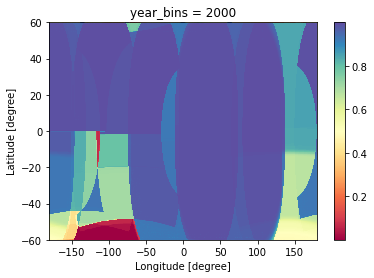

In [16]:
frac30_pentad.sel(year_bins=2000).plot(cmap='Spectral')

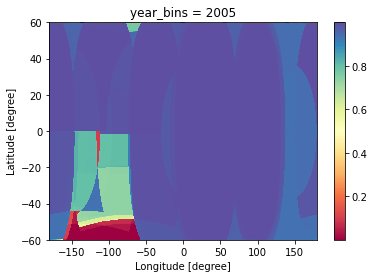

In [17]:
frac30_pentad.sel(year_bins=2005).plot(cmap='Spectral')

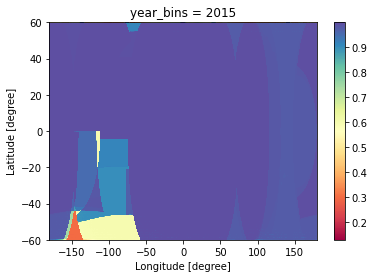

In [18]:
frac30_pentad.sel(year_bins=2015).plot(cmap='Spectral')

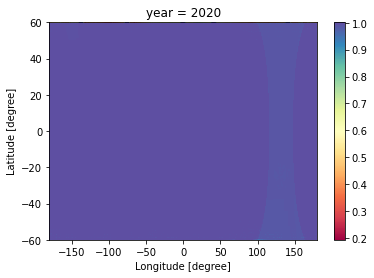

In [29]:
frac00_year.sel(year=2020).plot(cmap='Spectral')

In [26]:
ds.lon.min(), ds.lon.max(), ds.lat.min(), ds.lat.max()

(<xarray.DataArray 'lon' ()>
 array(-179.95),
 <xarray.DataArray 'lon' ()>
 array(179.95),
 <xarray.DataArray 'lat' ()>
 array(-59.95),
 <xarray.DataArray 'lat' ()>
 array(59.95))

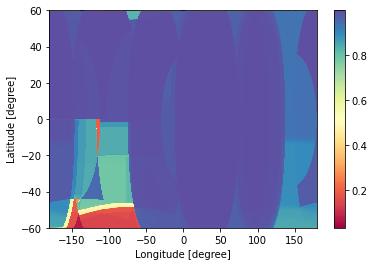

In [30]:
frac30_all.plot(cmap='Spectral')

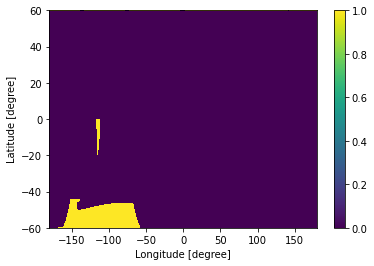

In [31]:
(frac30_all < 0.75).plot()

In [32]:
years

<xarray.DataArray 'year' (year: 20)>
array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
Coordinates:
  * year     (year) int64 2001 2002 2003 2004 2005 ... 2016 2017 2018 2019 2020

In [33]:
min_year = np.min(years.values)
max_year = np.max(years.values)
min_year, max_year

(2001, 2020)

In [36]:
# Save annual fraction data to a netCDF file
out_filename = f'{datadir}merg_valid_fraction_{min_year}_{max_year}.nc'

dsmap = xr.Dataset({'fraction_00min_all': (['lat', 'lon'], frac00_all), \
                    'fraction_30min_all': (['lat', 'lon'], frac30_all), \
                    'fraction_00min': (['year', 'lat', 'lon'], frac00_year), \
                    'fraction_30min': (['year', 'lat', 'lon'], frac30_year), \
                    }, \
                    coords={'year': (['year'], years), \
                            'lat': (['lat'], lat), \
                            'lon': (['lon'], lon)}, \
                    attrs={'title': 'MergIR valid data fraction', \
                            'contact':'Zhe Feng, zhe.feng@pnnl.gov', \
                            'created_on':time.ctime(time.time()), \
                            'produced_with':os.path.abspath(sys.argv[0]),\
                            })

dsmap.lon.attrs['long_name'] = 'Longitude'
dsmap.lon.attrs['units'] = 'degree'

dsmap.lat.attrs['long_name'] = 'Latitude'
dsmap.lat.attrs['units'] = 'degree'

dsmap.fraction_00min_all.attrs['long_name'] = 'Valid data fraction at 00min for all years'
dsmap.fraction_00min_all.attrs['units'] = 'fraction'

dsmap.fraction_30min_all.attrs['long_name'] = 'Valid data fraction at 30min for all years'
dsmap.fraction_30min_all.attrs['units'] = 'fraction'

dsmap.fraction_00min.attrs['long_name'] = 'Valid data fraction at 00min for each year'
dsmap.fraction_00min.attrs['units'] = 'fraction'

dsmap.fraction_30min.attrs['long_name'] = 'Valid data fraction at 30min for each year'
dsmap.fraction_30min.attrs['units'] = 'fraction'

fillvalue = np.nan
# Set encoding/compression for all variables
comp = dict(zlib=True, _FillValue=fillvalue, dtype='float32')
encoding = {var: comp for var in dsmap.data_vars}

dsmap.to_netcdf(path=out_filename, mode='w', format='NETCDF4_CLASSIC', unlimited_dims='time', encoding=encoding)
print('Output saved as: ', out_filename)

Output saved as:  /global/project/projectdirs/m1867/zfeng/gpm/MERGIR_Global/stats/merg_valid_fraction_2001_2020.nc


In [37]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=256):
    """ Truncate colormap.
    """
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [63]:
def plot_map_pentad(dataarray, titles, figtitle, levels, cmap, cblabel, cbticks, figname, oob_colors=None):
    
    mpl.rcParams['font.size'] = 7
    mpl.rcParams['font.family'] = 'Helvetica'

    map_extend = [-180., 180., -60.1, 60.1]
    lonvals = mpl.ticker.FixedLocator(np.arange(-180,180.1,30))
    latvals = mpl.ticker.FixedLocator(np.arange(-90,90.1,15))
    proj = ccrs.PlateCarree()
    levelshgt = [1000,10000]

    fig = plt.figure(figsize=[10,8], dpi=100)
    gs = gridspec.GridSpec(nrows=4, ncols=2, wspace=0.07, hspace=0.2)
    fig.text(0.5, 0.92, figtitle, fontsize=12, ha='center', va='center', transform=fig.transFigure, zorder=5)

    resolution = '110m'
    land = cfeature.NaturalEarthFeature('physical', 'land', resolution)
    ocean = cfeature.NaturalEarthFeature('physical', 'ocean', resolution)
    borders = cfeature.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land', resolution)

    for col in range(0,2):
        for row in range(0,4):
            ax = plt.subplot(gs[row,col], projection=proj)
            ax.set_extent(map_extend, crs=proj)
            ax.add_feature(land, facecolor='none', edgecolor='k', zorder=3)
            ax.set_title(titles[row][col], loc='left')
            ax.set_aspect('auto', adjustable=None)
            
            gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', linewidth=0.5)
#             gl.xlabels_top = False
#             gl.ylabels_right = False
            gl.top_labels = False
            gl.right_labels = False
            gl.xlocator = lonvals
            gl.ylocator = latvals
            gl.xformatter = LONGITUDE_FORMATTER
            gl.yformatter = LATITUDE_FORMATTER
            if (col != 0):
                gl.left_labels = False
            if (row != 3):
                gl.bottom_labels = False

            Zm = dataarray[row][col]
            cmap = plt.get_cmap(cmap)
            norm = mpl.colors.BoundaryNorm(boundaries=levels, ncolors=cmap.N)
            cf1 = ax.pcolormesh(lon, lat, Zm, norm=norm, cmap=cmap, transform=proj, zorder=2)
            if oob_colors is not None:
                cf1.cmap.set_over(oob_colors['over'])
                cf1.cmap.set_under(oob_colors['under'])
                cf1.set_clim(min(levels), max(levels))

    # Plot 1 colorbar by manually adding a new axes
    cax1 = fig.add_axes([0.91, 0.2, 0.015, 0.6])
    cb1 = plt.colorbar(cf1, cax=cax1, label=cblabel, ticks=cbticks, orientation='vertical')
    
    fig.savefig(figname, dpi=300, bbox_inches='tight', facecolor='w')
    return fig

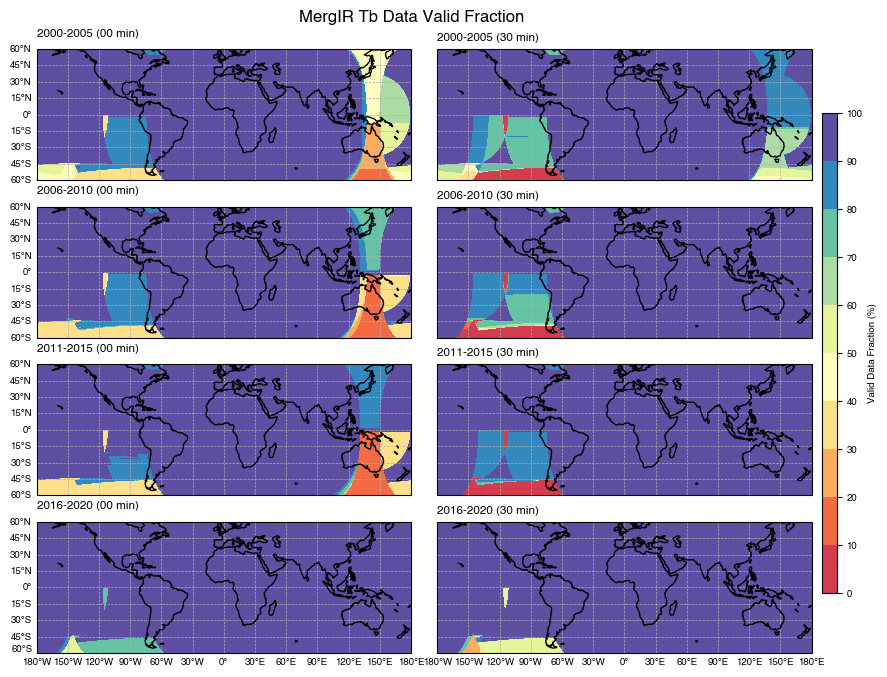

In [64]:
# titles = [['2000-2005 (00 min)','2006-2010 (00 min)','2011-2015 (00 min)','2016-2019 (00 min)'],
#           ['2000-2005 (30 min)','2006-2010 (30 min)','2011-2015 (30 min)','2016-2019 (30 min)']]
titles = [['2000-2005 (00 min)','2006-2010 (00 min)','2011-2015 (00 min)','2016-2020 (00 min)'],
          ['2000-2005 (30 min)','2006-2010 (30 min)','2011-2015 (30 min)','2016-2020 (30 min)']]
titles = np.array(titles).T.tolist()
dataarr = [[frac00_pentad[0]*100, frac30_pentad[0]*100],
           [frac00_pentad[1]*100, frac30_pentad[1]*100],
           [frac00_pentad[2]*100, frac30_pentad[2]*100],
           [frac00_pentad[3]*100, frac30_pentad[3]*100]]
min_nsample = 0
figtitle = 'MergIR Tb Data Valid Fraction'
levels = np.arange(0, 100.1, 10)
cbticks = levels
cblabel = 'Valid Data Fraction (%)'
cmap = plt.get_cmap('Spectral')
cmap = truncate_colormap(cmap, 0.1, 1)
figname = f'{figdir}merg_validdata_frac_pentad_{min_year}-{max_year}.png'
fig = plot_map_pentad(dataarr, titles, figtitle, levels, cmap, cblabel, cbticks, figname)

In [26]:
figdir

'/global/project/projectdirs/m1867/zfeng/gpm/MERGIR_Global/stats/'

In [52]:
def plot_2maps(dataarray, levels, cmap, cblabel, cbticks, titles, figname):
    
#     mpl.rcParams['font.size'] = 13
    mpl.rcParams['font.size'] = 10
    mpl.rcParams['font.family'] = 'Helvetica'

    map_extend = [-180, 180.1, -60.1, 60.1]
    lonvals = mpl.ticker.FixedLocator(np.arange(-180,180.1,60))
    latvals = mpl.ticker.FixedLocator(np.arange(-60,60.1,20))
    levelshgt = [1000,2000]

    land = cfeature.NaturalEarthFeature('physical', 'land', '110m')
    ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '110m')
    borders = cfeature.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land', '110m')
    
    fig = plt.figure(figsize=[10,7], dpi=100)

    for pp in range(0,2):
        data = dataarray[pp]

        ax = plt.subplot(2, 1, pp+1, projection=ccrs.PlateCarree())
        ax.set_extent(map_extend, crs=ccrs.PlateCarree())
#         ax.add_feature(ocean, edgecolor='k', facecolor=cfeature.COLORS['water'])
#         ax.add_feature(borders, edgecolor='k', facecolor='none', linewidth=1, zorder=5)
        ax.add_feature(land, facecolor='none', edgecolor='k', zorder=5)
        ax.set_aspect('auto', adjustable=None)

        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', linewidth=0.5)
#         gl.xlabels_top = False
#         gl.ylabels_right = False
        gl.right_labels = False
        gl.top_labels = False
        gl.xlocator = lonvals
        gl.ylocator = latvals
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER

        Zm = np.ma.masked_where(((data == 0) | (np.isnan(data))), data)
        norm = mpl.colors.BoundaryNorm(boundaries=levels, ncolors=256)
        cf1 = ax.pcolormesh(lon, lat, Zm, norm=norm, vmin=np.min(levels), vmax=np.max(levels), cmap=cmap, transform=ccrs.PlateCarree())
#         cf1 = plt.contourf(lon, lat, Zm, levels=levels, cmap=cmap, transform=ccrs.PlateCarree(), zorder=2, extend='both')
        ax.set_title(titles[pp], loc='left')
        cb1 = plt.colorbar(cf1, label=cblabel, pad=0.02, ticks=cbticks)

#     plt.tight_layout(w_pad=2.5, h_pad=1.2)
#     fig.tight_layout(h_pad=0.5)
#     fig.tight_layout()
    fig.savefig(figname, dpi=300, bbox_inches='tight')
    return fig

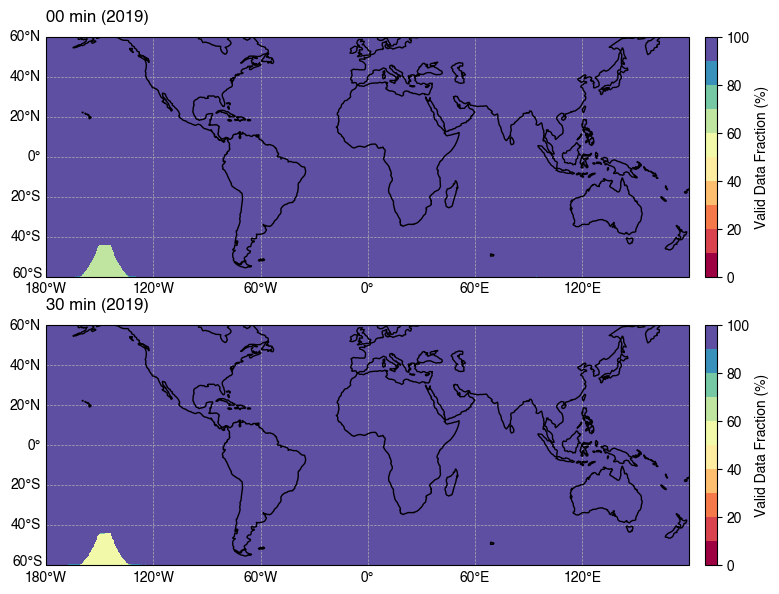

In [58]:
levels = np.arange(0, 100.1, 10)
cbticks = np.arange(0, 100.1, 20)
cblabel = 'Valid Data Fraction (%)'
cmap = 'Spectral'

iyear = 2019
titles = [f'00 min ({iyear})', f'30 min ({iyear})']
figname = f'{figdir}merg_validdata_frac_{iyear}.png'
dataarr = [frac00_year.sel(year=iyear)*100, frac30_year.sel(year=iyear)*100]
fig = plot_2maps(dataarr, levels, cmap, cblabel, cbticks, titles, figname)

In [55]:
figdir

'/global/project/projectdirs/m1867/zfeng/gpm/MERGIR_Global/stats/'

In [60]:
levels = np.arange(0, 100.1, 10)
cbticks = np.arange(0, 100.1, 20)
cblabel = 'Valid Data Fraction (%)'
cmap = 'Spectral'

# Loop over each year
for iyear in range(min_year, max_year+1):
#     print(iyear)
#     print(years.values[ii])
#     print(frac00_year.sel(year=years.values[ii]).shape)
    titles = [f'00 min ({iyear})', f'30 min ({iyear})']
    figname = f'{figdir}merg_validdata_frac_{iyear}.png'
    dataarr = [frac00_year.sel(year=iyear)*100, frac30_year.sel(year=iyear)*100]
    fig = plot_2maps(dataarr, levels, cmap, cblabel, cbticks, titles, figname)
    plt.close(fig)
    print(f'Figure saved: {figname}')

Figure saved: /global/project/projectdirs/m1867/zfeng/gpm/MERGIR_Global/stats/merg_validdata_frac_2001.png
Figure saved: /global/project/projectdirs/m1867/zfeng/gpm/MERGIR_Global/stats/merg_validdata_frac_2002.png
Figure saved: /global/project/projectdirs/m1867/zfeng/gpm/MERGIR_Global/stats/merg_validdata_frac_2003.png
Figure saved: /global/project/projectdirs/m1867/zfeng/gpm/MERGIR_Global/stats/merg_validdata_frac_2004.png
Figure saved: /global/project/projectdirs/m1867/zfeng/gpm/MERGIR_Global/stats/merg_validdata_frac_2005.png
Figure saved: /global/project/projectdirs/m1867/zfeng/gpm/MERGIR_Global/stats/merg_validdata_frac_2006.png
Figure saved: /global/project/projectdirs/m1867/zfeng/gpm/MERGIR_Global/stats/merg_validdata_frac_2007.png
Figure saved: /global/project/projectdirs/m1867/zfeng/gpm/MERGIR_Global/stats/merg_validdata_frac_2008.png
Figure saved: /global/project/projectdirs/m1867/zfeng/gpm/MERGIR_Global/stats/merg_validdata_frac_2009.png
Figure saved: /global/project/project

In [43]:
# levels = np.arange(0, 100.1, 10)
# cbticks = np.arange(0, 100.1, 20)
# cblabel = 'Valid Data Fraction (%)'
# cmap = 'Spectral'

# # Loop over each year
# for ii, iyear in enumerate(years):
# #     print(iyear.values)
# #     print(years.values[ii])
# #     print(frac00_year.sel(year=years.values[ii]).shape)
#     titles = [f'00 min ({iyear.values})', f'30 min ({iyear.values})']
#     figname = f'{figdir}merg_validdata_frac_{iyear.values}.png'
#     dataarr = [frac00_year.sel(year=iyear)*100, frac30_year.sel(year=iyear)*100]
#     fig = plot_2maps(dataarr, levels, cmap, cblabel, cbticks, titles, figname)

In [61]:
f'{min_year}-{max_year}'

'2001-2020'

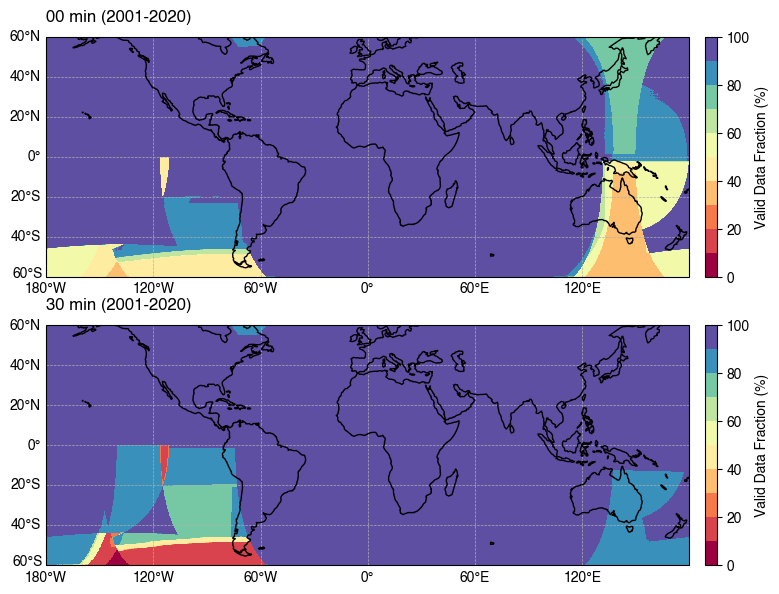

In [62]:
dataarr = [frac00_all*100, frac30_all*100]
levels = np.arange(0, 100.1, 10)
cbticks = np.arange(0, 100.1, 20)
cblabel = 'Valid Data Fraction (%)'
cmap = 'Spectral'
titles = [f'00 min ({min_year}-{max_year})', f'30 min ({min_year}-{max_year})']
figname = f'{figdir}merg_validdata_frac_{min_year}-{max_year}.png'
fig = plot_2maps(dataarr, levels, cmap, cblabel, cbticks, titles, figname)